# 1. Exploratory Data Analysis - California Housing

**Goal:** Understand distributions, outliers, and relationships in the data.

**Key Steps:**
- Univariate analysis (distributions)
- Bivariate analysis (correlations)
- Geospatial visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load Data
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(f"Dataset Shape: {df.shape}")
print(f"\nFeatures: {list(housing.feature_names)}")
df.head()

Dataset Shape: (20640, 9)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1. Summary Statistics

In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 2. Univariate Analysis

Checking distributions for skewness and outliers.

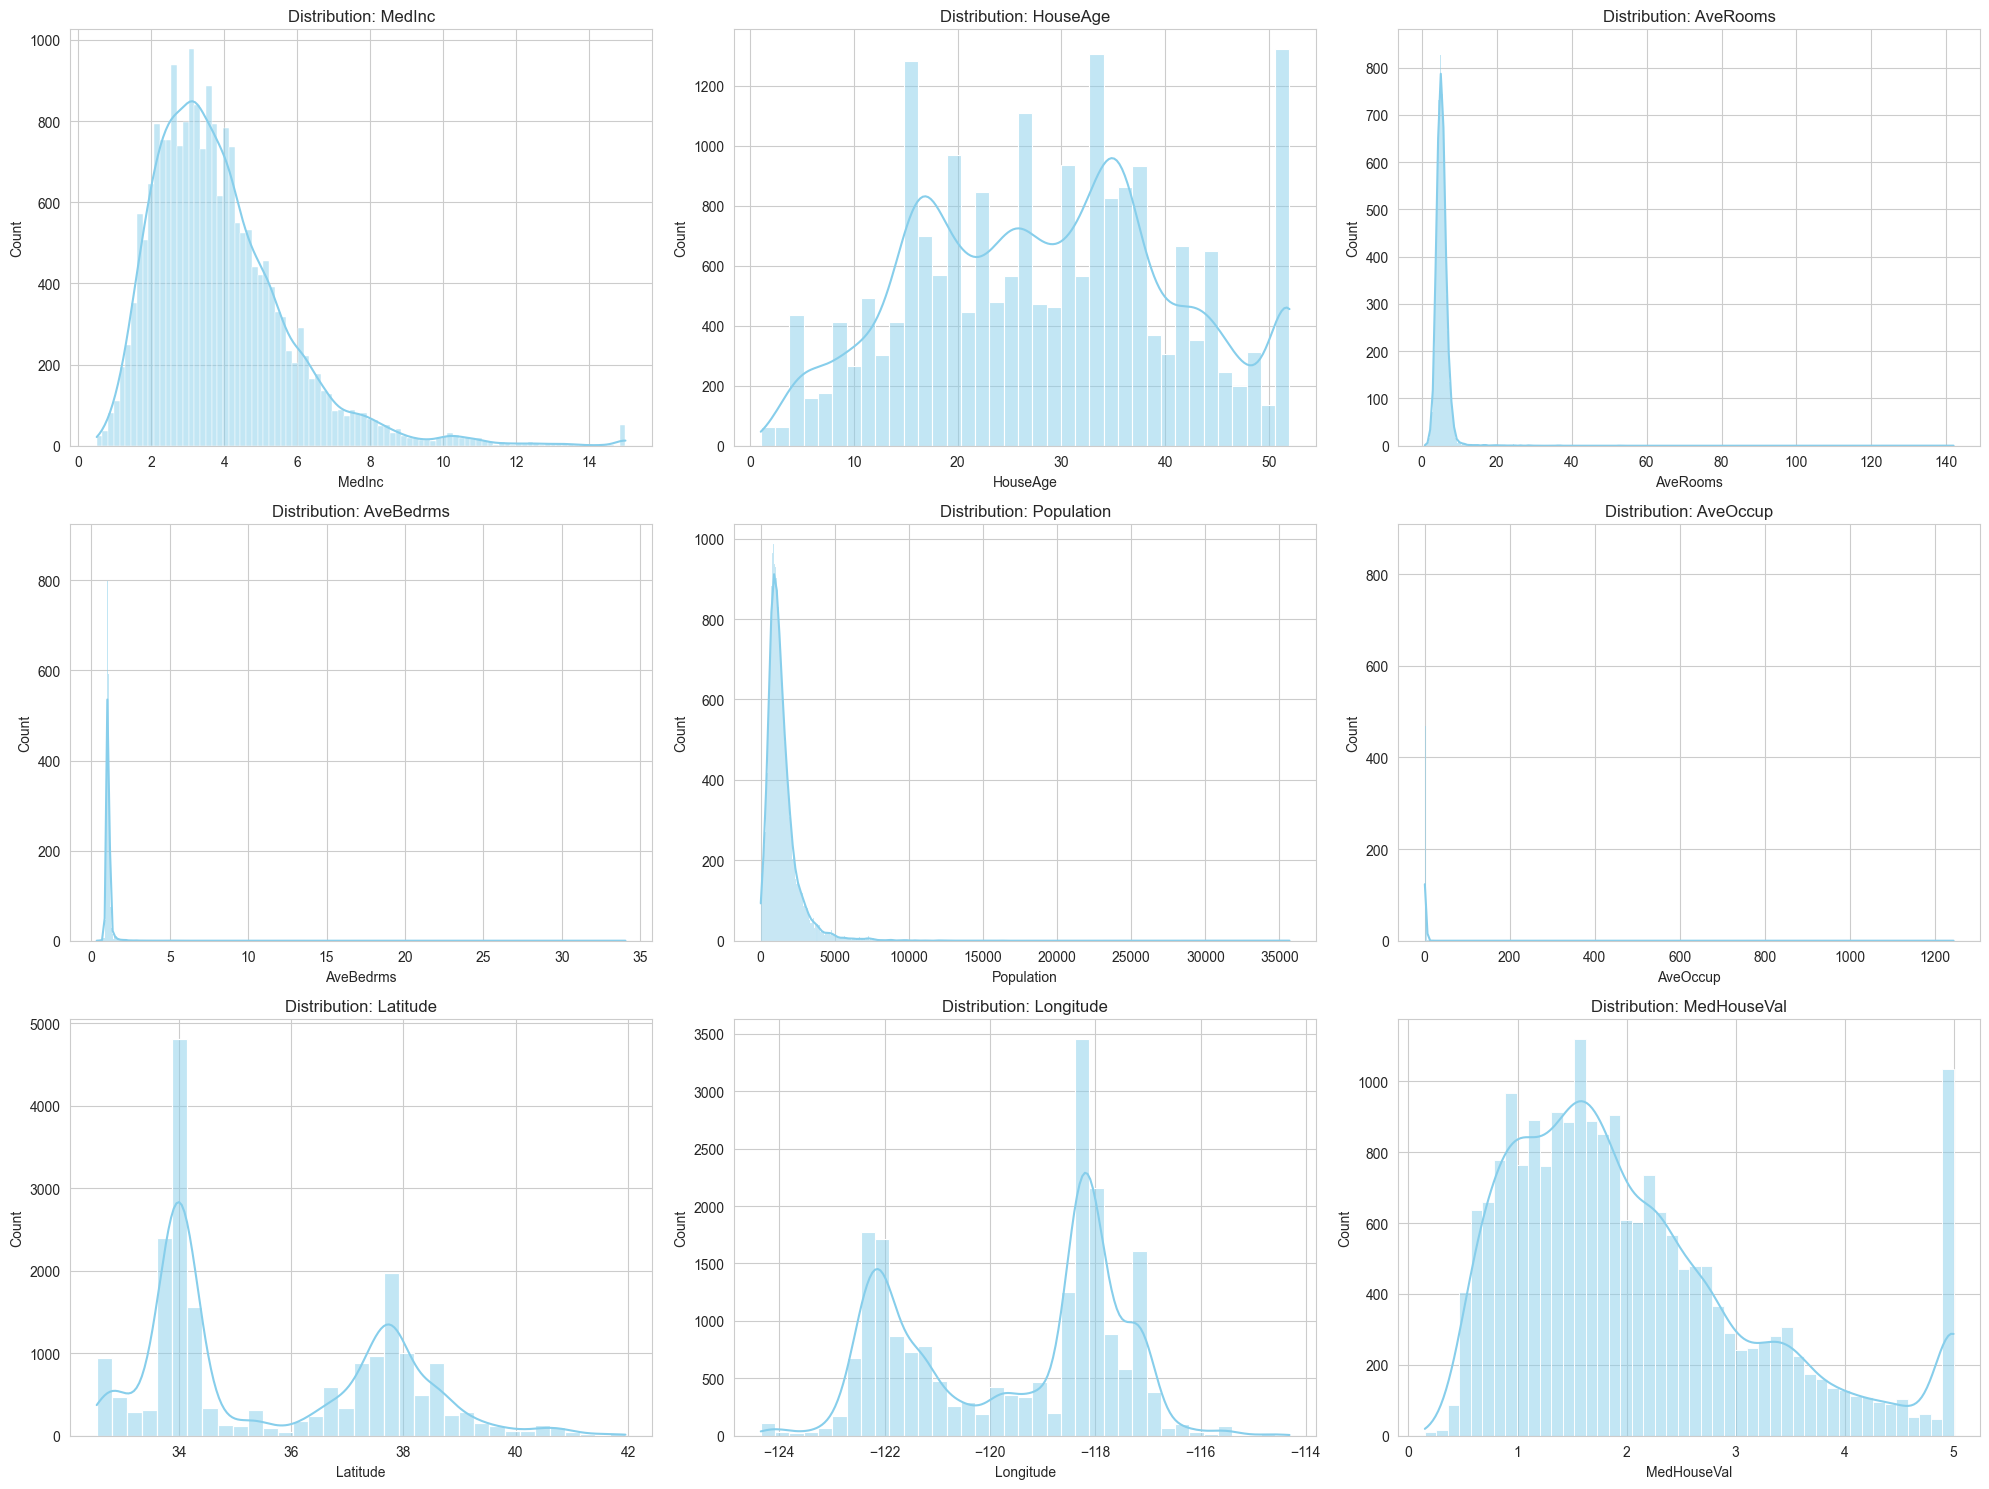


📊 KEY OBSERVATIONS:
✓ MedInc (Median Income) is right-skewed
✓ AveRooms has massive outliers (hotels?)
✓ MedHouseVal has hard cap at 5.0 ($500k) - data quality issue


In [4]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
cols = df.columns

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3], color='skyblue')
    axes[i//3, i%3].set_title(f'Distribution: {col}')

plt.tight_layout()
plt.show()

print("\n📊 KEY OBSERVATIONS:")
print("✓ MedInc (Median Income) is right-skewed")
print("✓ AveRooms has massive outliers (hotels?)")
print("✓ MedHouseVal has hard cap at 5.0 ($500k) - data quality issue")

## 3. Geospatial Analysis

California housing prices are heavily location-dependent.

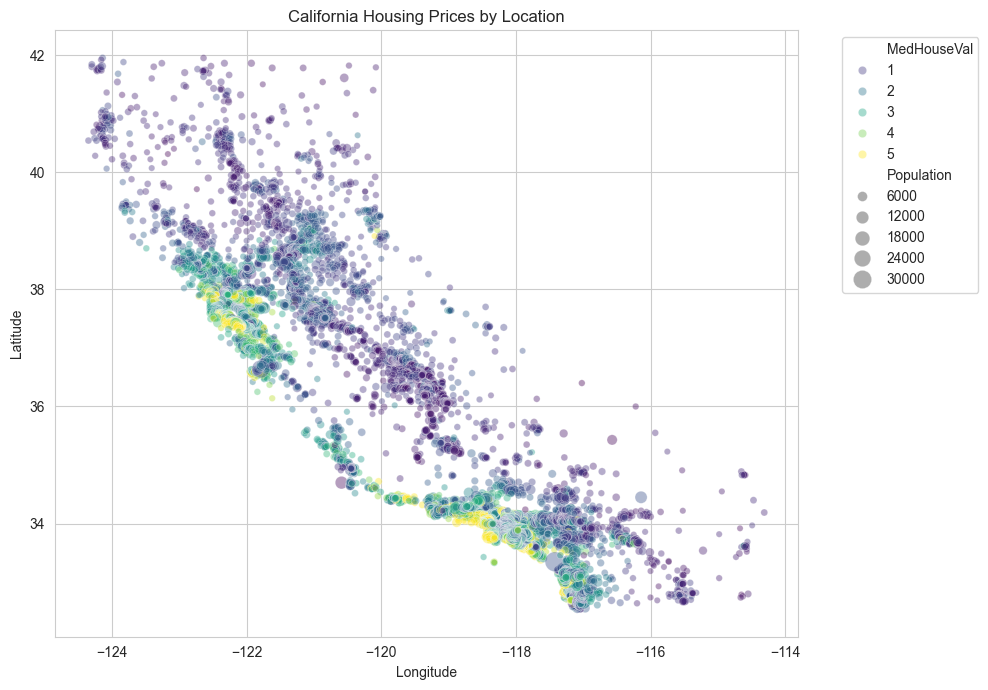


💡 INSIGHT: Prices highest near coast (Bay Area, LA)
   → 'Distance to Coast' would be valuable feature


In [5]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df, x="Longitude", y="Latitude",
    size="Population", hue="MedHouseVal",
    palette="viridis", alpha=0.4, sizes=(20, 200)
)
plt.title("California Housing Prices by Location")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\n💡 INSIGHT: Prices highest near coast (Bay Area, LA)")
print("   → 'Distance to Coast' would be valuable feature")

## 4. Correlation Analysis

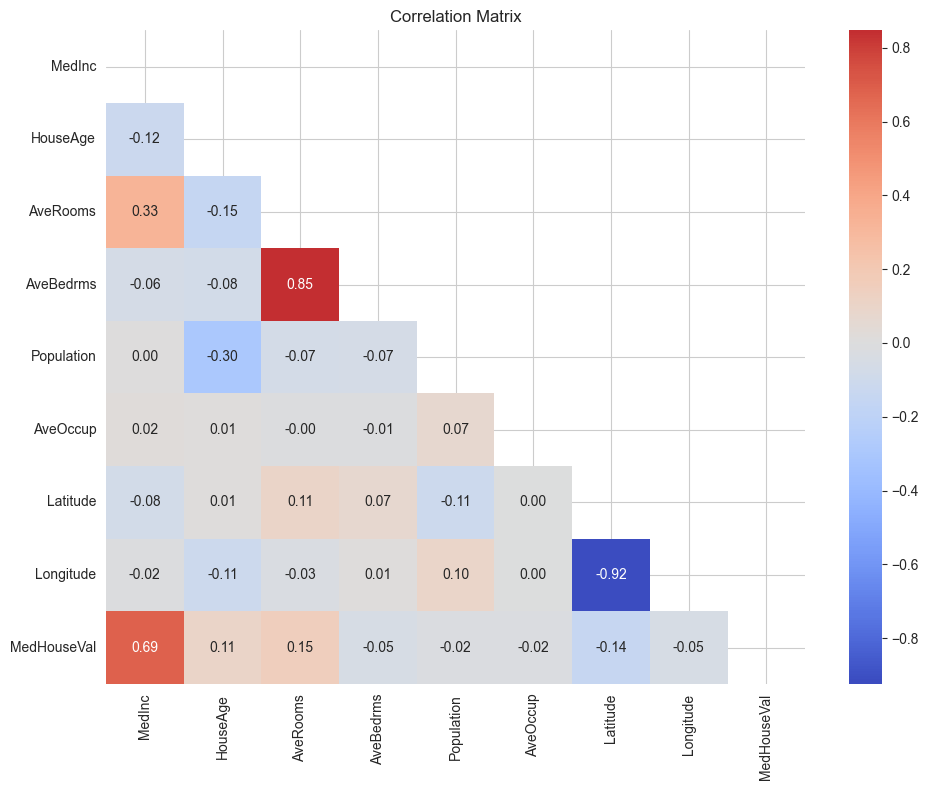


🔍 KEY RELATIONSHIPS:
✓ MedInc ↔ MedHouseVal: 0.688 (Strong)
⚠ AveRooms ↔ AveBedrms: 0.848 (Multicollinearity risk)


In [6]:
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

print("\n🔍 KEY RELATIONSHIPS:")
print(f"✓ MedInc ↔ MedHouseVal: {df.corr().loc['MedInc', 'MedHouseVal']:.3f} (Strong)")
print(f"⚠ AveRooms ↔ AveBedrms: {df.corr().loc['AveRooms', 'AveBedrms']:.3f} (Multicollinearity risk)")